In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
# from lime import lime_tabular
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

shap.initjs()
warnings.filterwarnings('ignore')

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv


In [3]:
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [4]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

In [5]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )

In [6]:
y = df['aprobado']
X = df[
    [
        "exitosos",
        "fallidos",
        "hito1",
        "hito2",
        "e0",
        "e1",
        "e3",
        "e4",
        "e6",
        "e7",
        "e9",
        "e10",
        "e11",
        "e12",
        "e13",
        "e17",
        "e18",
        "e21",
        "e22",
        "e23",
        "e25",
        "e26",
        "e28",
        "e29",
        "e32",
        "e35",
        "e37",
        "e38",
        "e42",
        "e44"
    ]
]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state= 1502)

In [12]:
from patsy import dmatrices

y, X = dmatrices(
    "aprobado ~ exitosos + fallidos + hito1 + hito2 + e0 + e1 + e3 + e4 + e6 + e7 + e9 + e10 + e11 + e12 + e13 + e17 + e18 + e21 + e22 + e23 + e25 + e26 + e28 + e29 + e32 + e35 + e37 + e38 + e42 + e44 -1",
    data=df,
)

X_frame = pd.DataFrame(data=X, columns=X.design_info.column_names)

In [13]:
import xgboost

model = xgboost.XGBClassifier().fit(X_train, y_train)

predict = model.predict(X_test)

In [14]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predict)
f1

0.5866666666666668

In [15]:
explainer = shap.Explainer(model)
shap_values = explainer(X_frame)

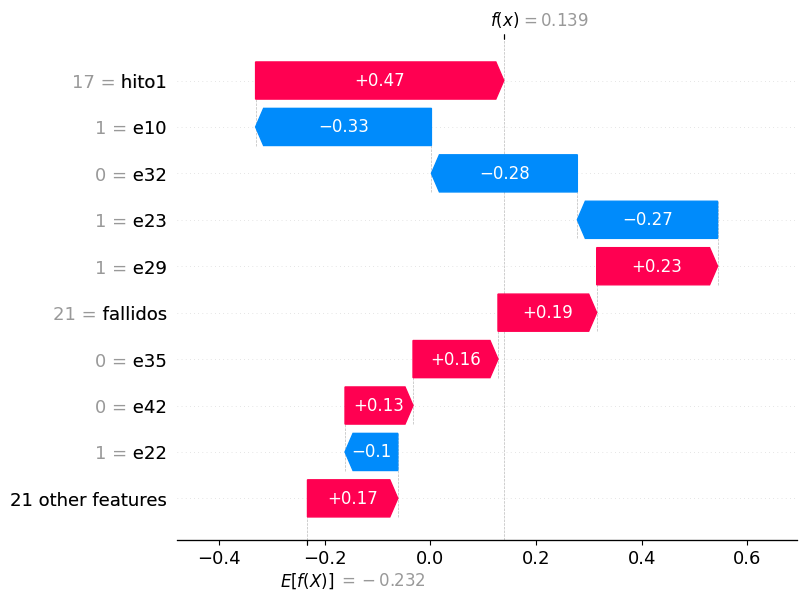

In [16]:
shap.plots.waterfall(shap_values[0])

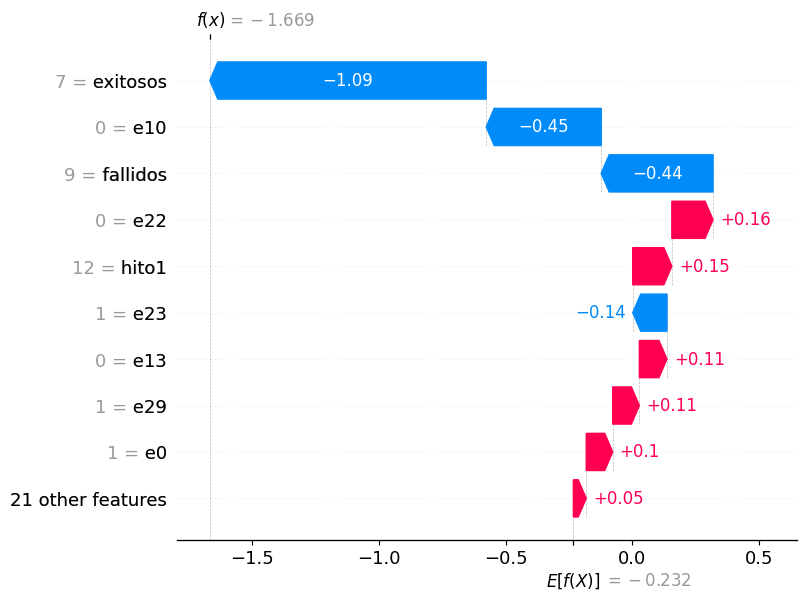

In [17]:
shap.plots.waterfall(shap_values[1])


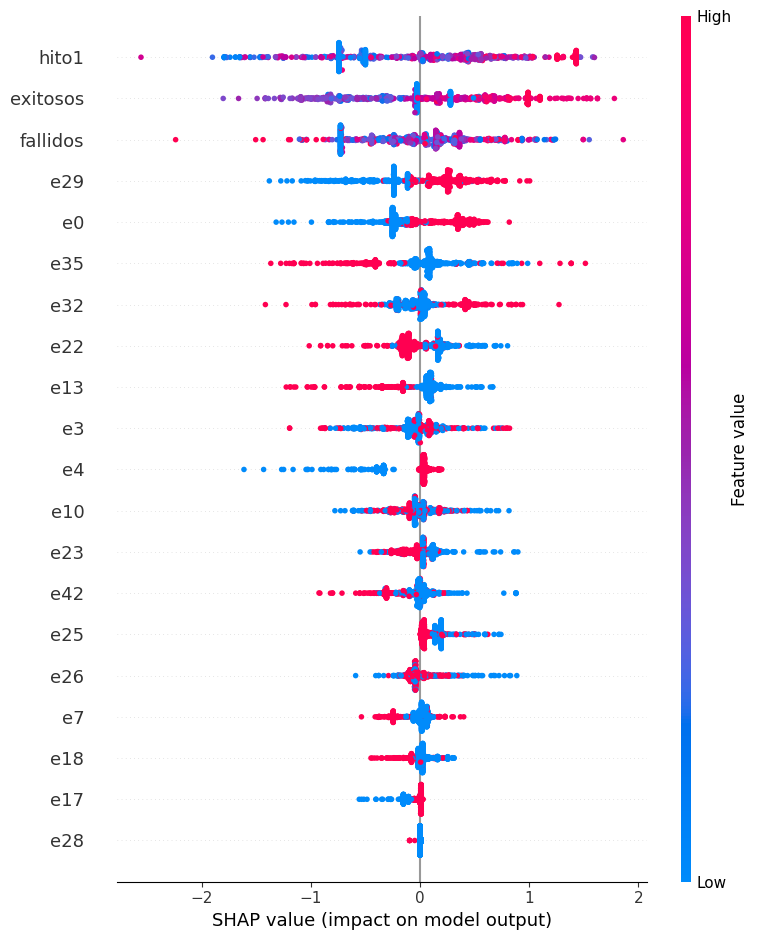

In [18]:
shap.summary_plot(shap_values, X)

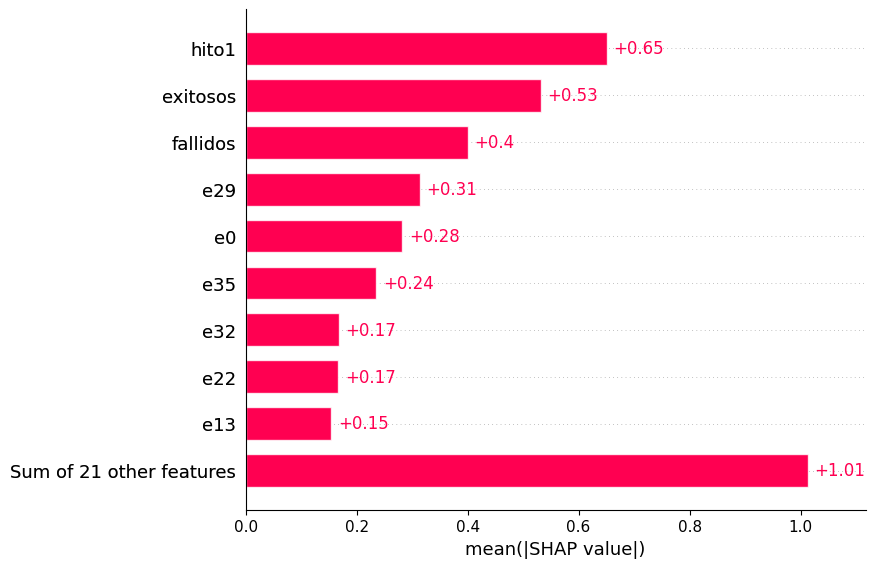

In [19]:
shap.plots.bar(shap_values)

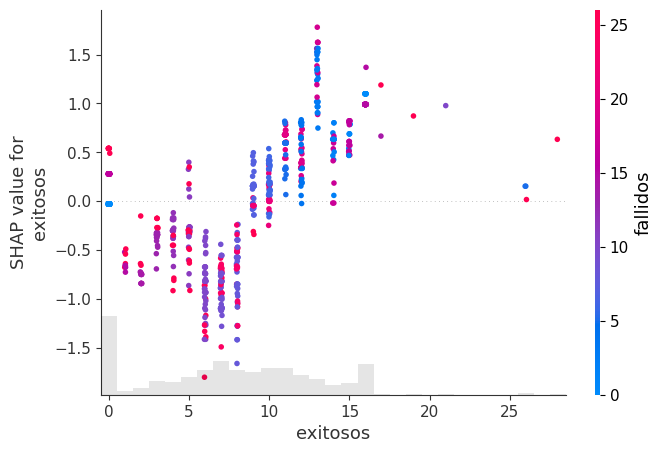

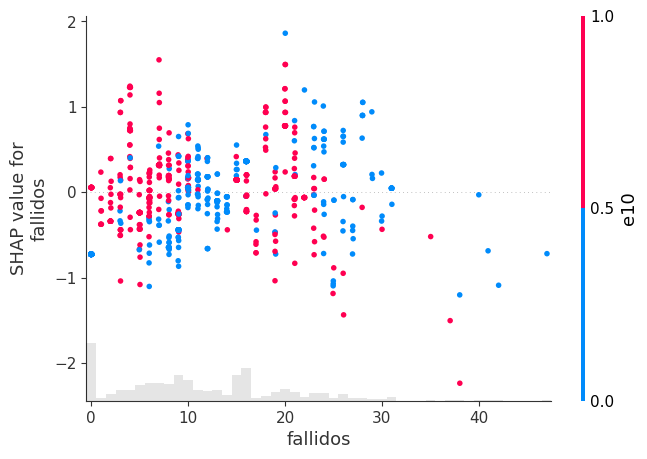

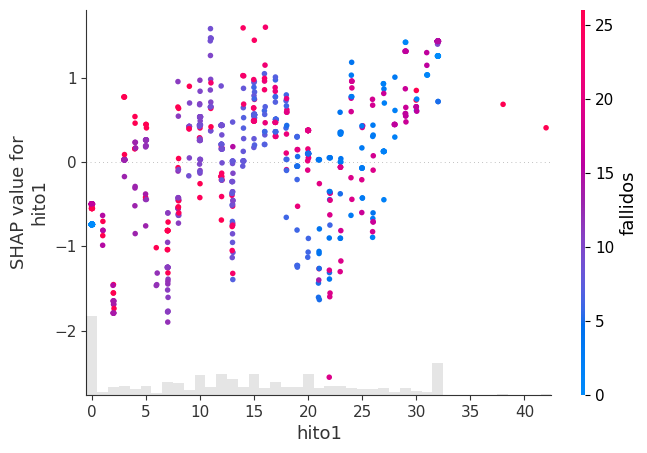

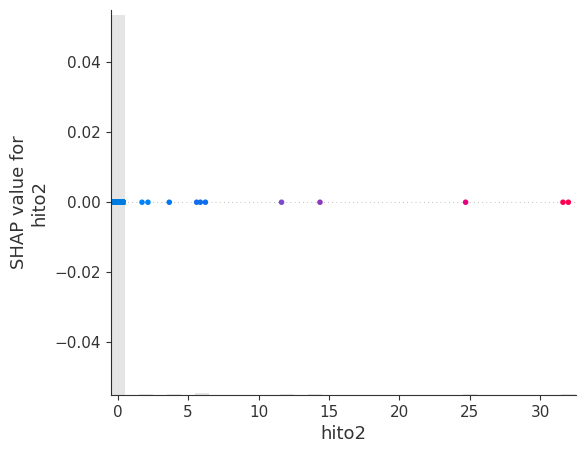

In [22]:
shap.plots.scatter(shap_values[:, "exitosos"], color=shap_values)
shap.plots.scatter(shap_values[:, "fallidos"], color=shap_values)
shap.plots.scatter(shap_values[:, "hito1"], color=shap_values)
shap.plots.scatter(shap_values[:, "hito2"], color=shap_values)

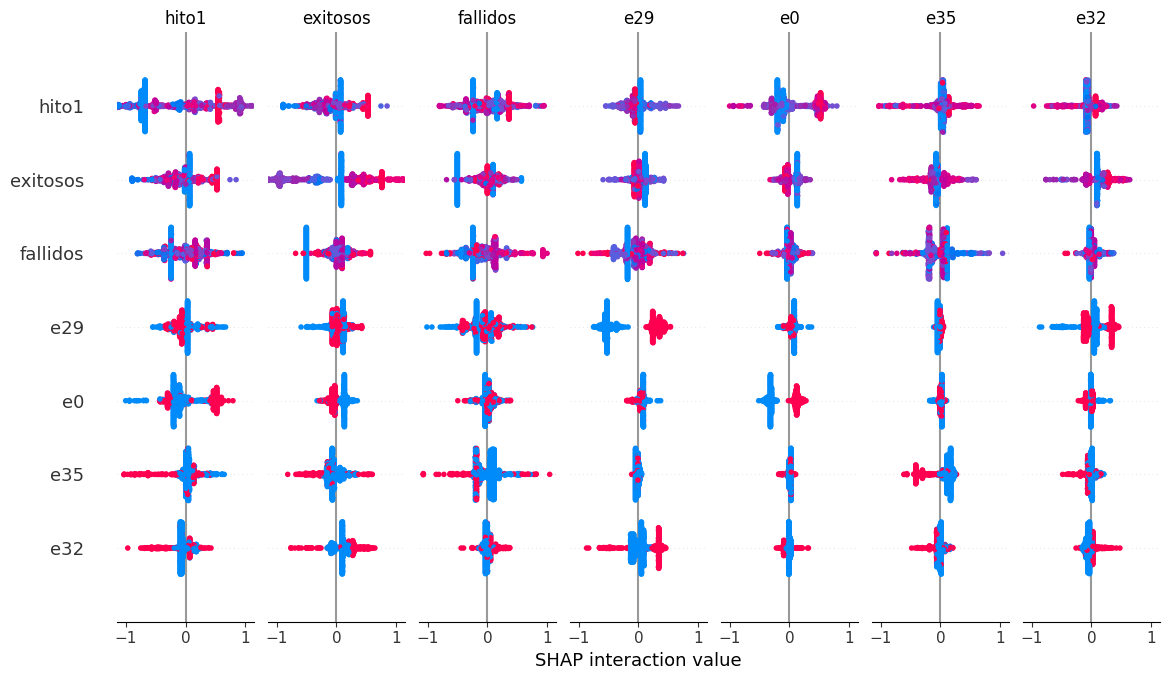

In [23]:
# Get interaction values
shap_interaction_values = explainer.shap_interaction_values(X)

# Summarize the interaction values
shap.summary_plot(shap_interaction_values, X_frame)